In [1]:
%pip install pandas
%pip install seaborn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np           
import seaborn as sns  
import matplotlib.pyplot as plt

In [6]:
print("CHARGEMENT DES DONNÉES...")

df = pd.read_csv('diabetes.csv')

print(f"Dimensions du dataset: {df.shape}")
print(f"Colonnes: {df.columns.tolist()}")

CHARGEMENT DES DONNÉES...
Dimensions du dataset: (768, 9)
Colonnes: ['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [8]:
print("ANALYSE EXPLORATOIRE ...")

print("Information sur le dataset:")

print(df.info())


print("Valeurs manquantes par colonne:")

print(df.isnull().sum())

print("Nombre de doublons:", df.duplicated().sum())



ANALYSE EXPLORATOIRE ...
Information sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Valeurs manquantes par colonne:
Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0


Distribution des variables ...


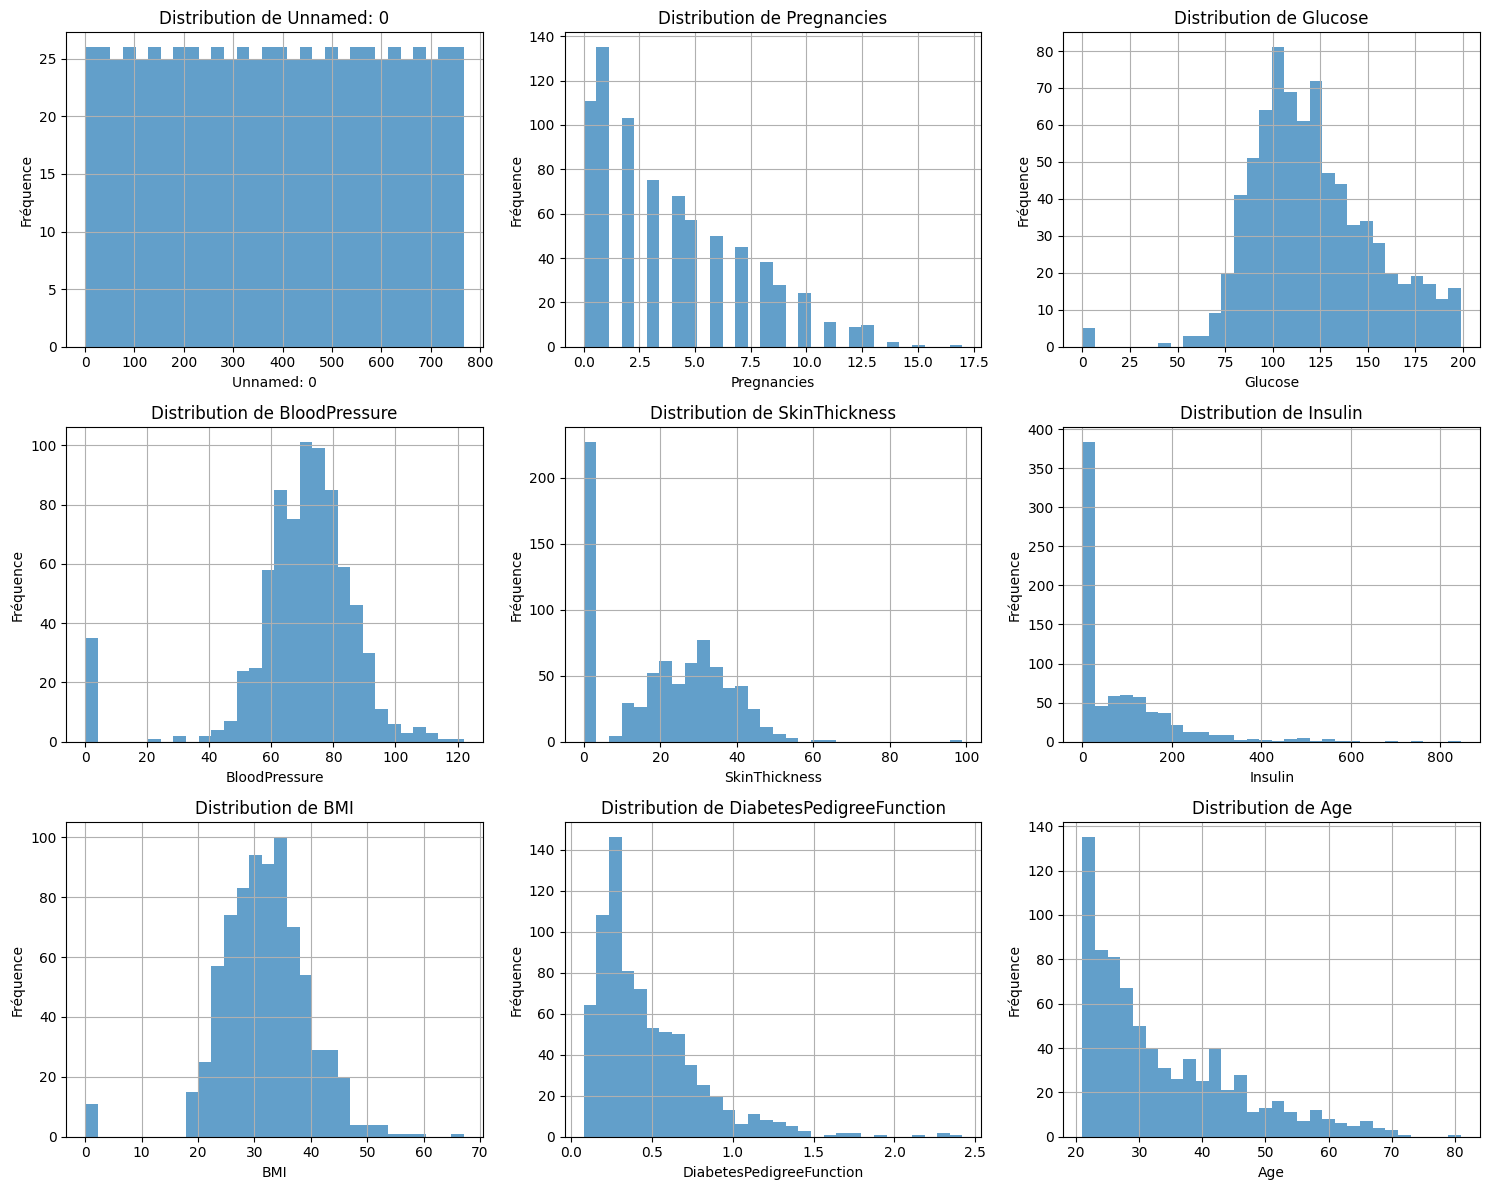

Matrice de corrélation ...


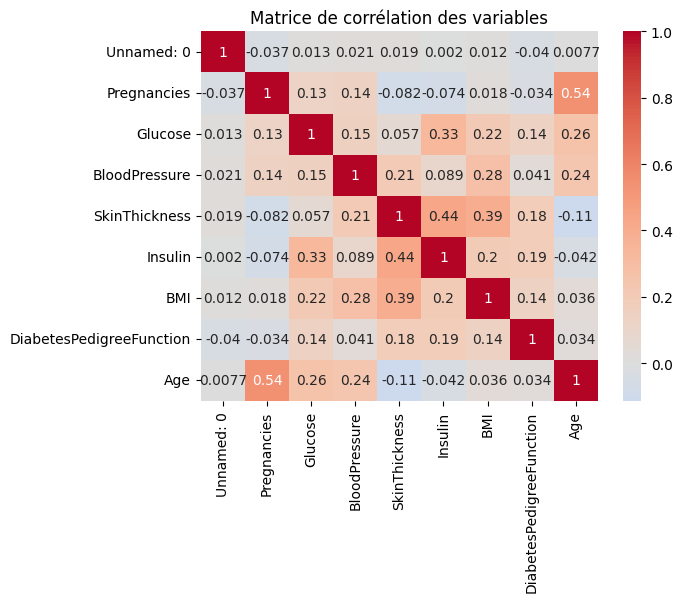

In [9]:
print("Distribution des variables ...")

fig, axes = plt.subplots(3, 3, figsize=(15, 12))

axes = axes.ravel()

for i, column in enumerate(df.columns):
    if i < len(axes):
        df[column].hist(bins=30, ax=axes[i], alpha=0.7)
        axes[i].set_title(f'Distribution de {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()



print("Matrice de corrélation ...")

plt.Figure(figsize=(10, 8))
corrélation_matrice = df.corr()
sns.heatmap(corrélation_matrice, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation des variables')
plt.show()


In [1]:
def detect_outliers (df, column):
    Q1 = df [column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) & (df[column] > upper_bound)


